<a href="https://colab.research.google.com/github/NabhyaIoT2026/Machine-Learning/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset


In [67]:
data = pd.read_csv('weather.csv')

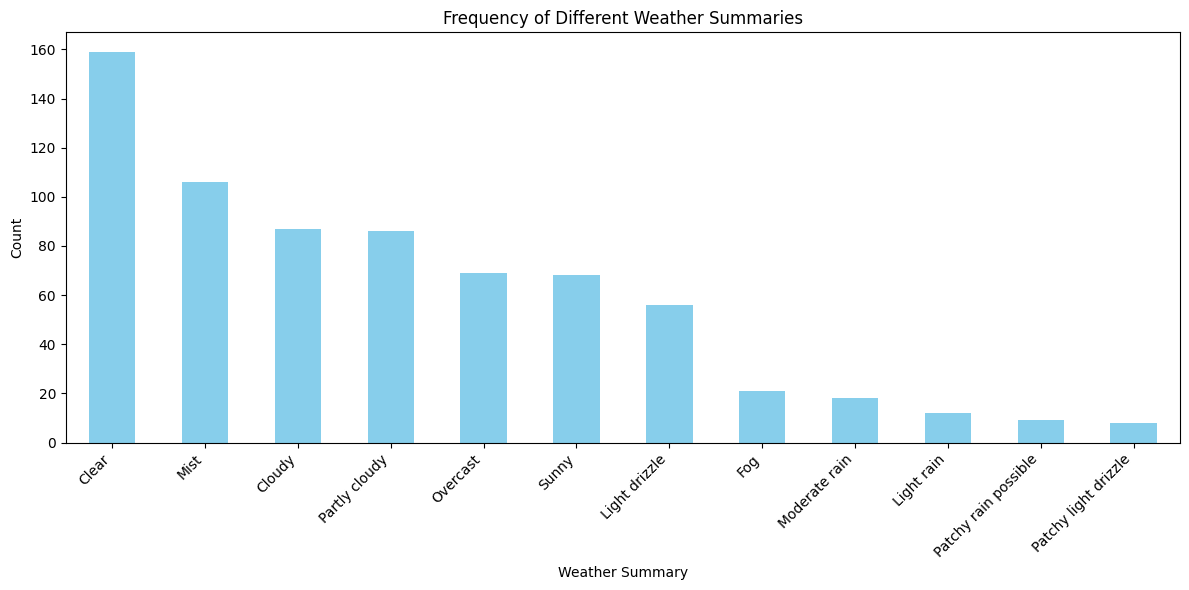

In [68]:
weather_summary_counts = data['weather__hourly__weatherDesc__value'].value_counts()

# Plot a bar chart for weather summary counts
plt.figure(figsize=(12, 6))
weather_summary_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Different Weather Summaries")
plt.xlabel("Weather Summary")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Target variable selection and binary classification based on median temperature

In [69]:
target_column = 'weather__hourly__tempC'
data['temp_category'] = (data[target_column] >= data[target_column].median()).astype(int)

Drop unnecessary columns

In [70]:
drop_columns = ['City', 'weather__hourly__UTCdate', 'weather__hourly__UTCtime', target_column]
data = data.drop(columns=drop_columns)

Handling categorical data and missing values if necessary

In [71]:
data = pd.get_dummies(data, drop_first=True)

Splitting data into features and target

In [72]:
X = data.drop(columns=['temp_category'])
y = data['temp_category']

Split data into training and test sets

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature scaling

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Define models

In [75]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss')
}

Train and evaluate each model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


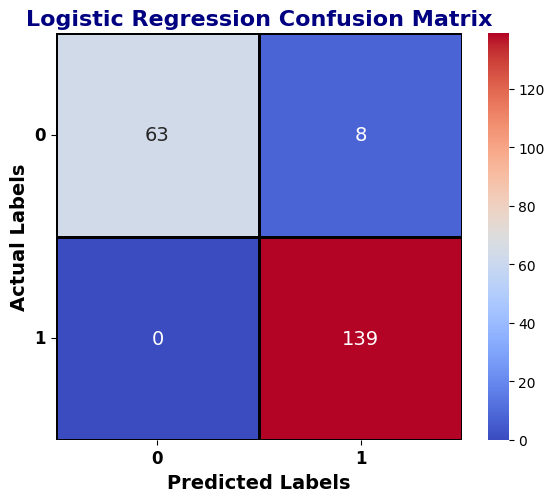

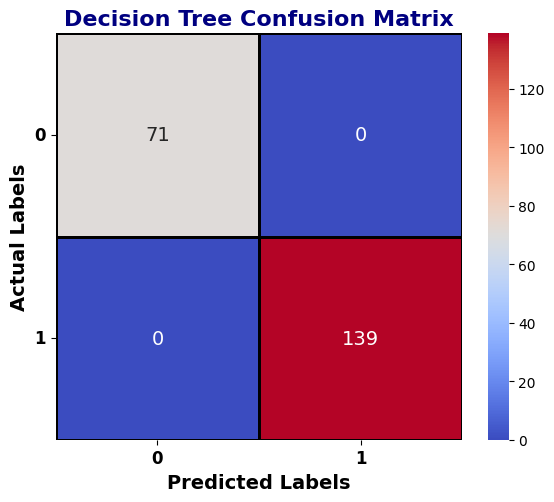

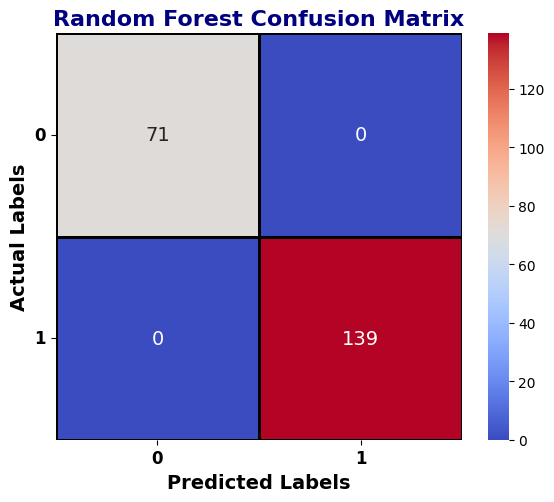

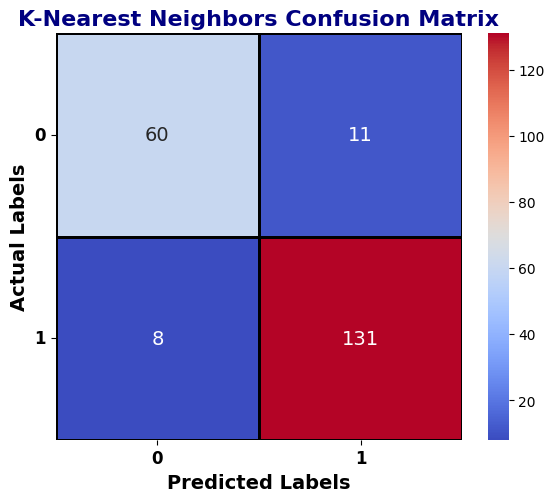

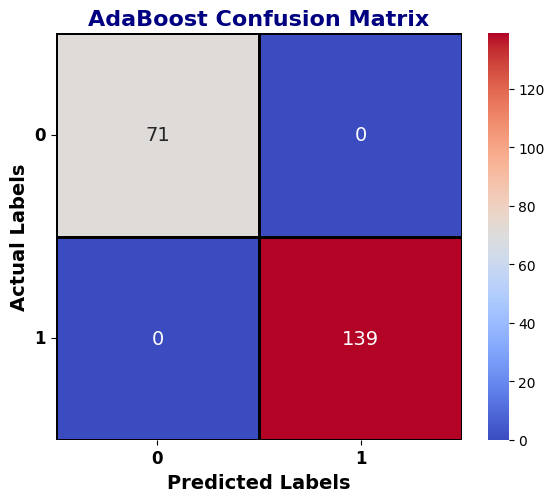

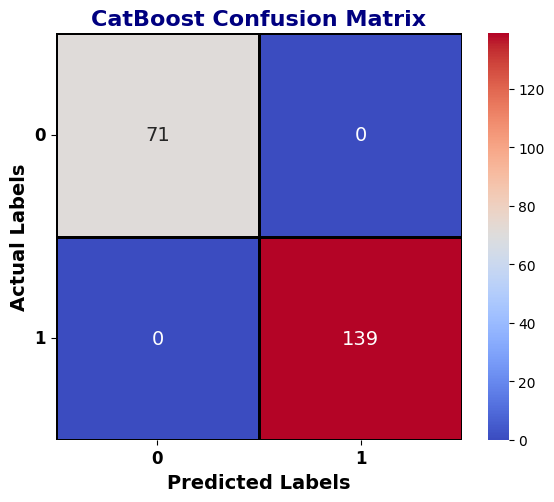

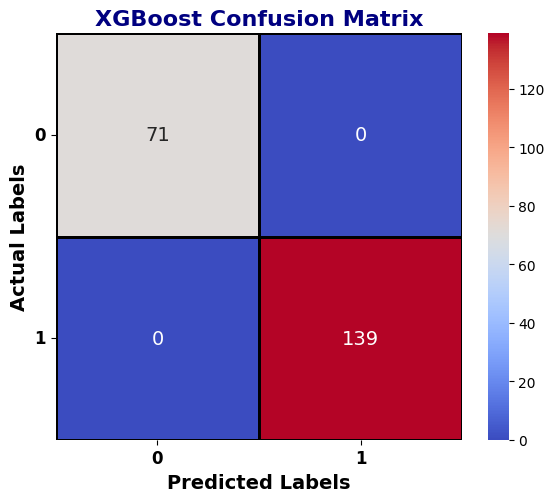

In [76]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with aesthetic style
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
        annot_kws={"size": 14}, linewidths=1, linecolor='black', square=True
    )

    # Title and labels with improved font settings
    plt.title(f"{model_name} Confusion Matrix", fontsize=16, weight='bold', color='navy')
    plt.xlabel("Predicted Labels", fontsize=14, weight='bold')
    plt.ylabel("Actual Labels", fontsize=14, weight='bold')

    # Adjust layout for readability
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold', rotation=0)
    plt.tight_layout()

# Display all confusion matrix plots at once
plt.show()

Define a figure for plotting the comparison graph

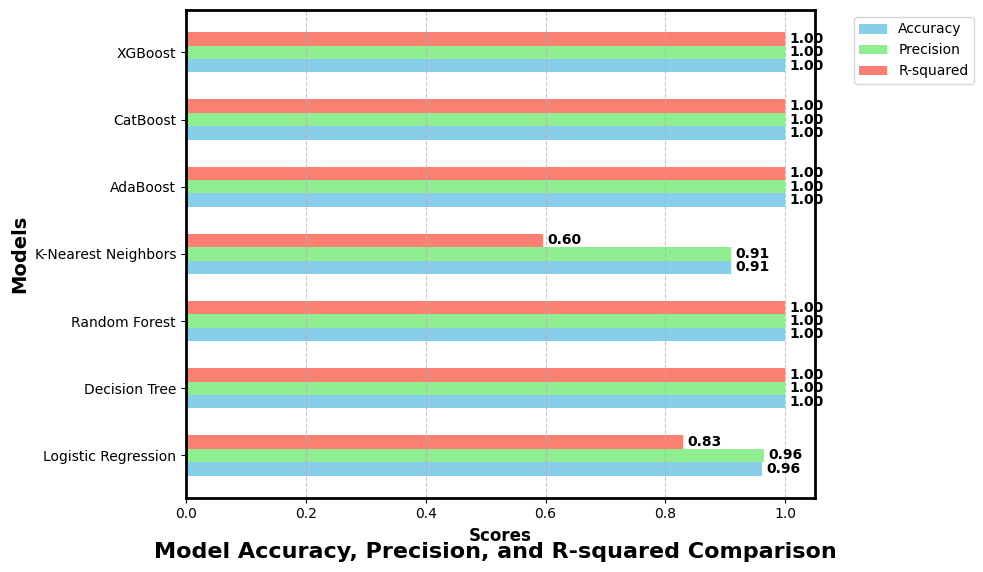

In [77]:
# Set up positions for grouped bars
x = np.arange(len(model_names))  # Model indices
width = 0.2  # Bar width

# Create subplots with grouped bars for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Horizontal bar plots for each metric with adjusted spacing
bar1 = ax.barh(x - width, accuracies, width, label='Accuracy', color='skyblue')
bar2 = ax.barh(x, precisions, width, label='Precision', color='lightgreen')
bar3 = ax.barh(x + width, r_squareds, width, label='R-squared', color='salmon')

# Add metric values on top of each bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontweight='bold')

# Labels and title
ax.set_ylabel("Models", fontsize=14, weight='bold')
ax.set_xlabel("Scores", fontsize=12, weight='bold')
ax.set_yticks(x)
ax.set_yticklabels(model_names)

# Title below the chart
fig.suptitle("Model Accuracy, Precision, and R-squared Comparison", fontsize=16, weight='bold', y=0.03)

# Move the legend outside the plot to the right
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Increase the border thickness for the figure
fig.patch.set_linewidth(2)  # Adjust this value for the figure border thickness

# Increase the border thickness for the axes
for spine in ax.spines.values():
    spine.set_linewidth(2)  # Adjust this value for the axes' border thickness

# Adjust the layout to prevent the border from covering numbers
plt.subplots_adjust(left=0.1, right=0.85, top=0.92, bottom=0.1)

# Grid and layout adjustments
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Make sure tight layout is called after adjusting margins
plt.show()